In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as st
import time
import datetime

In [48]:
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
             "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]
PartyAff = ["R","D","R","D","R","R","D","R","R"]
filepath = "../Data/Cleaned President Ratings/"


In [56]:
#Approval Ratings
Approval_Ratings = pd.DataFrame()
Start_Date = []
End_Date = []

for i in range(len(Presidents)):
    Approval_Rating = pd.read_csv(f"{filepath}{Presidents[i]}-Ratings.csv")
    Approval_Rating["President"] = Presidents[i]
    Start_Date.append(Approval_Rating["Start Date"][len(Approval_Rating["Start Date"])-1])
    End_Date.append(Approval_Rating["End Date"][0])
    Approval_Ratings = pd.concat([Approval_Ratings,Approval_Rating],ignore_index = True)

President_Terms = pd.DataFrame({"Presidents":Presidents,
                                "Start Date":Start_Date,
                                "End Date":End_Date,
                               "Afilliation":PartyAff})
Approval_Ratings

,Start Date,End Date,Approving,Disapproving,Unsure/NoData,Year,Month,President
0,2018-10-08,2018-10-14,44,51,5,2018,10,Donald Trump
1,2018-10-01,2018-10-07,43,53,4,2018,10,Donald Trump
2,2018-09-24,2018-09-30,42,53,5,2018,9,Donald Trump
3,2018-09-17,2018-09-23,40,56,4,2018,9,Donald Trump
4,2018-09-10,2018-09-16,38,56,6,2018,9,Donald Trump
...,...,...,...,...,...,...,...,...
3901,1969-04-04,1969-04-10,59,11,28,1969,4,Richard Nixon
3902,1969-03-27,1969-04-01,62,10,27,1969,4,Richard Nixon
3903,1969-03-12,1969-03-17,65,8,26,1969,3,Richard Nixon
3904,1969-02-20,1969-02-25,59,6,34,1969,2,Richard Nixon


In [55]:
#Clean up Approval Ratings

Average_Month_Approval_Ratings = Approval_Ratings.groupby(["Year","Month"]).mean().reset_index()
Average_Month_Approval_Ratings

,Year,Month,Approving,Disapproving,Unsure/NoData
0,1969,1,59.00,5.000000,36.000000
1,1969,2,59.00,6.000000,34.000000
2,1969,3,65.00,8.000000,26.000000
3,1969,4,59.00,16.000000,23.333333
4,1969,5,61.00,13.333333,24.333333
...,...,...,...,...,...
565,2018,6,42.25,53.500000,4.250000
566,2018,7,41.60,54.000000,4.400000
567,2018,8,40.75,54.000000,5.250000
568,2018,9,40.20,54.400000,5.400000


In [14]:
#Get Unemployment Data
filepath = "../Data/Unemployment Data.csv"
Unemployment_Data = pd.read_csv(filepath)
Unemployment_Data

,Years,Months,Unemployment Rate
0,2019,9,3.5
1,2019,8,3.7
2,2019,7,3.7
3,2019,6,3.7
4,2019,5,3.6
...,...,...,...
712,1960,5,5.1
713,1960,4,5.2
714,1960,3,5.4
715,1960,2,4.8


In [15]:
Total_Data = pd.merge(Average_Month_Approval_Ratings,Unemployment_Data, how = "inner", 
                      left_on=["Year","Month"], right_on=["Years","Months"])
Total_Data

,Year,Month,Approving,Disapproving,Unsure/NoData,Years,Months,Unemployment Rate
0,1969,1,59.00,5.000000,36.000000,1969,1,3.4
1,1969,2,59.00,6.000000,34.000000,1969,2,3.4
2,1969,3,65.00,8.000000,26.000000,1969,3,3.4
3,1969,4,59.00,16.000000,23.333333,1969,4,3.4
4,1969,5,61.00,13.333333,24.333333,1969,5,3.4
...,...,...,...,...,...,...,...,...
565,2018,6,42.25,53.500000,4.250000,2018,6,4.0
566,2018,7,41.60,54.000000,4.400000,2018,7,3.9
567,2018,8,40.75,54.000000,5.250000,2018,8,3.8
568,2018,9,40.20,54.400000,5.400000,2018,9,3.7


Text(0.5, 1.0, 'Unemployment Rate vs Presidential Approval Rating')

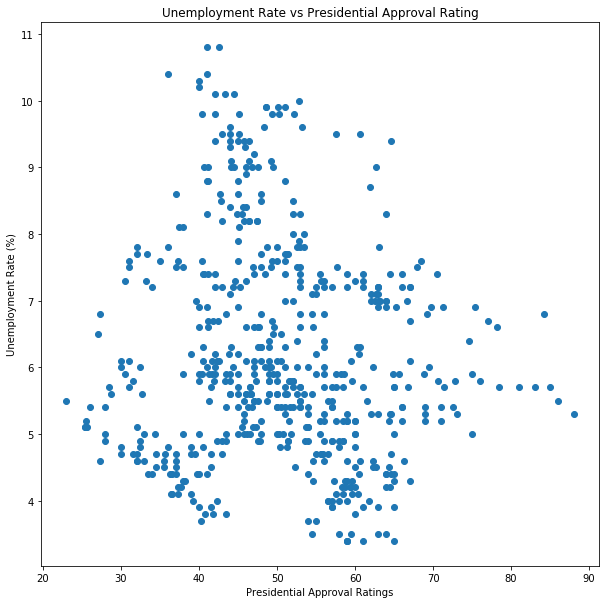

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(Total_Data["Approving"],Total_Data["Unemployment Rate"])

plt.xlabel("Presidential Approval Ratings")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs Presidential Approval Rating")


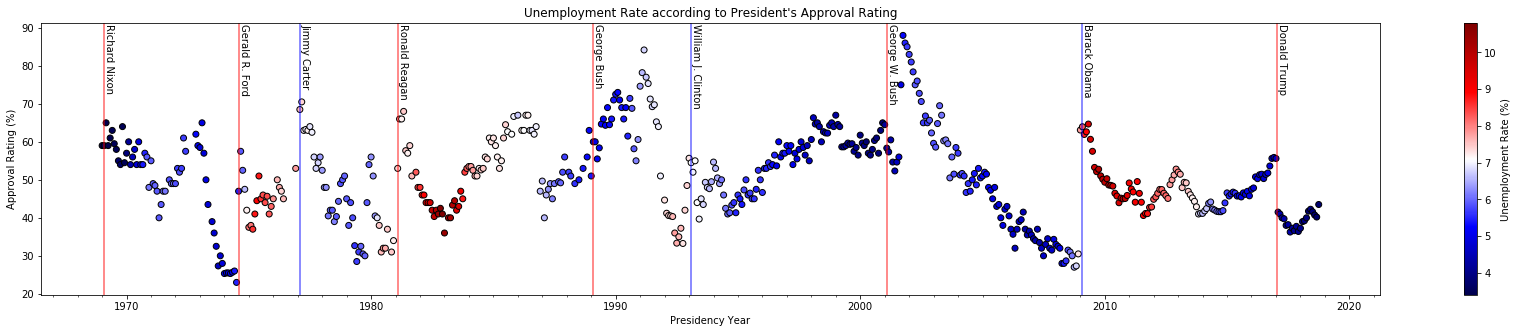

In [72]:
M_Y = []
for i in range(len(Total_Data)):
    M_Y.append(datetime.date(Total_Data["Year"][i],Total_Data["Months"][i],1))
Total_Data["M_Y"] = M_Y
Total_Data

plt.figure(figsize = (30,5))
plt.scatter(Total_Data["M_Y"], Total_Data["Approving"], c=Total_Data["Unemployment Rate"],cmap = "seismic", edgecolor='black')
# plt.gca().xaxis.set_major_locator(dates.YearLocator())
plt.gca().xaxis.set_minor_locator(dates.YearLocator())
# plt.xticks(rotation=90)
for terms in range(len(President_Terms)):
    if(President_Terms["Afilliation"][terms]=="R"):
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Red")
    else:
        plt.axvline(x=President_Terms["Start Date"][terms], alpha = 0.6, color = "Blue")
    plt.text(President_Terms["Start Date"][terms], 91, Presidents[terms],rotation=270,verticalalignment='top', 
                 horizontalalignment = "left")

plt.colorbar().set_label("Unemployment Rate (%)")
plt.xlabel("Presidency Year") 
plt.ylabel("Approval Rating (%)")
plt.title("Unemployment Rate according to President's Approval Rating")
plt.savefig("Hi.png")
